In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load the tarin and test data set in pandas dataframe
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
#check number of rows and column present in dataset [TRAIN]
train.shape

(8523, 12)

In [4]:
#print the name of coloumn in train dataset [TRAIN]
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
#check number of rows and column present in dataset [test]
test.shape

(5681, 11)

In [6]:
#print the name of coloumn in train dataset [test]
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [7]:
#conbime test and train into one file to perform exploratory Data Analysis [EDA]
train["source"] = "train"
test["source"] = "test"
data = pd.concat([train,test],ignore_index = True)
print(data.shape)

(14204, 13)


In [8]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [9]:
#describe the numberical data summary
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
#checking missing value
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [11]:
#the coloumn item_weight has 24390 missing values outlet_size has 4016 missing value and item_outlet_sales has 5681 
#which will predict using the model


In [12]:
data['Item_Weight']

0         9.30
1         5.92
2        17.50
3        19.20
4         8.93
         ...  
14199    10.50
14200     7.60
14201    10.00
14202    15.30
14203     9.50
Name: Item_Weight, Length: 14204, dtype: float64

In [13]:
#print the unique values in tem_fat_content column , where the data ranges from 1985 to 2009
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [14]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [15]:
#print the unique values in the outlet_establishment_year column , where the data ranges from 1985 to 2009
data['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [16]:
#calculate the outlet_age
data['Outlet_Age'] = 2018 - data['Outlet_Establishment_Year']
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,9


In [17]:
#print unique vakue of Outlet_size
data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [18]:
#printinig the count value
data["Item_Fat_Content"].count()

14204

In [19]:
#printing the count value of Outlet_Size
data["Outlet_Size"].count()

10188

In [20]:
#using the mode function to find the most commomn value of Outlet_Size
data["Outlet_Size"].mode()[0]

'Medium'

In [21]:
#verifying the medium is the most common value
a=0
b=0
c=0
d=0
for i in range (14204) :
    if data["Outlet_Size"][i] == "High":
        a=a+1
    elif data["Outlet_Size"][i] == "Medium":
        b+=1
    elif data["Outlet_Size"][i] == "Small":
        c+=1
    else:
        d+=1

print(a,b,c,d)

1553 4655 3980 4016


In [22]:
#two variable with missing values - item_weight and outlet_size
#replacing missingvalues in Outlet_size with the value "medium"
data["Outlet_Size" ] = data["Outlet_Size"].fillna(data["Outlet_Size"].mode()[0])

In [23]:
#replace missing values in Item_Weight with the mean height
data["Item_Weight"] = data["Item_Weight"].fillna(data["Item_Weight"].mean())

<Axes: >

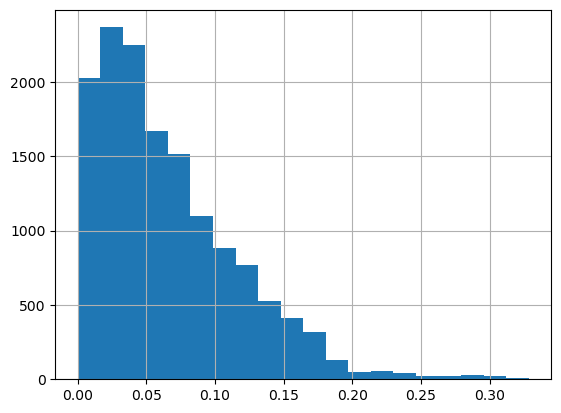

In [24]:
#plot a histogram to reveal the distribution of Item_Visiblity Cdataolumn
# data["Item_Visibility"].hist(bins=20)
data["Item_Visibility"].hist(bins=20)


<Axes: xlabel='Item_Visibility', ylabel='Count'>

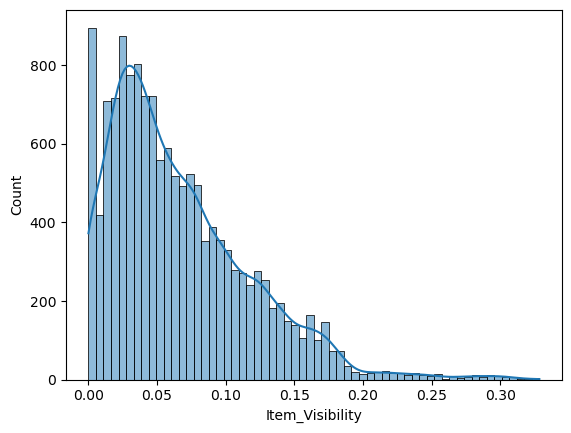

In [25]:
sns.histplot(data=data, x="Item_Visibility" , kde = True)
#code of drawing histplot

In [26]:
#detecting outlier:
#an outlier is a data point that lies outside the overalll pattern in a distribution .
#a commonly used rule states that a data point is an outliers if it is more than 1.5*IQR above the third quartile or below the first quartile .
#using this one can remove the outlier and output the resulting data in fill_data variable.
#calculate the first quantile for Item_Visibility
Q1 = data["Item_Visibility"].quantile(0.25)

In [27]:
#calculate the second quantile for Item_Visibility
Q3 = data["Item_Visibility"].quantile(0.75)

In [28]:
#calculate the interquartile range (IQR)
IQR = Q3 - Q1

In [29]:
##now the IQR range is known remove the outliers from the data
#the resulting data is stored in fill_data variable
fill_data = data.query('(@Q1 - 1.5 *@IQR) <= Item_Visibility <=(@Q3 + 1.5 * @IQR)')

In [30]:
#Display tthe data
fill_data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,9


In [31]:
#check the shape 
fill_data.shape

(13943, 14)

In [32]:
#shape of original dataset
data.shape

(14204, 14)

In [33]:
#assign fill_data the dataset to data DataFrame
data = fill_data

In [34]:
data.shape

(13943, 14)

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
#modify item_visibility by converting the numerical values into high visibility visibility and low visibility
data["Item_Visibility_bins"] = pd.cut(data["Item_Visibility"], [0.000, 0.065, 0.13, 0.2], labels = ['Low Viz', 'Viz', 'High Viz'])

In [37]:
#print the count Item_Visibility_bins
data["Item_Visibility_bins"].value_counts()

Low Viz     7363
Viz         4283
High Viz    1418
Name: Item_Visibility_bins, dtype: int64

In [38]:
#replace null with low visibility
data["Item_Visibility_bins"] = data["Item_Visibility_bins"].replace(np.nan, "Low Viz", regex = True)

In [39]:
#replace all other repersentation of low fat with low fat
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace(["low fat", "LF"], "Low Fate")

In [40]:
#replace all the representation of reg with regular
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace("reg", "Regular")

In [41]:
#print unique fat count values
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'Low Fate'], dtype=object)

In [42]:
#code all categorical variable as numvric using 'label encoder from sklearn's preprocessing module 
#initialize the label encoder
le = LabelEncoder()

In [43]:
#transform Item_Fat_Content
data["Item_Fat_Content"] = le.fit_transform(data["Item_Fat_Content"])

In [44]:
#transform Item_Visibility_bins
data["Item_Visibility_bins"] = le.fit_transform(data["Item_Visibility_bins"])

In [45]:
#transform Outlet_size
data["Outlet_Size"] = le.fit_transform(data["Outlet_Size"])

In [46]:
#transform Outlet_Location_Type
data["Outlet_Location_Type"] = le.fit_transform(data["Outlet_Location_Type"])

In [47]:
#print unique fat Outlet_Type
data["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [48]:
#create dummies for Outlet_Type
dummy = pd.get_dummies(data["Outlet_Type"])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [49]:
#explore the column Item_Identifier
data["Item_Identifier"]

0        FDA15
1        DRC01
2        FDN15
3        FDX07
4        NCD19
         ...  
14199    FDB58
14200    FDD47
14201    NCO17
14202    FDJ26
14203    FDU37
Name: Item_Identifier, Length: 13943, dtype: object

In [50]:
#as there are multiple values of food , nonconsumable items , and drinks with different numbers , combine the item type
data["Item_Identifier"].value_counts()

FDE33    10
FDM12    10
FDY47    10
FDT03    10
FDO01    10
         ..
FDA10     7
FDO33     7
FDZ60     7
NCW54     7
FDG21     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [51]:
#as the multiple categories are present in Item_Identifier , reduce this by mapping
data["Item_Type_Combined"] = data["Item_Identifier"].apply(lambda x: x[0:2])
data["Item_Type_Combined"] = data["Item_Type_Combined"].map({'FD': 'Food',
                                                             'NC': 'Non-Consumable',
                                                             'DR': 'Drinkks'})

In [52]:
#only three categories are present in an Item_Type_Combined column
data["Item_Type_Combined"].value_counts()

Food              9991
Non-Consumable    2652
Drinkks           1300
Name: Item_Type_Combined, dtype: int64

In [53]:
data.shape

(13943, 16)

In [54]:
#perform one hot encoding for all column as the model wors on mumerical values and not an categorical values
data = pd.get_dummies(data, columns=["Item_Type_Combined" , "Outlet_Location_Type", "Outlet_Size", "Outlet_Type","Item_Type_Combined"])

In [55]:
data.dtypes #d type is dummy type

Item_Identifier                       object
Item_Weight                          float64
Item_Fat_Content                       int32
Item_Visibility                      float64
Item_Type                             object
Item_MRP                             float64
Outlet_Identifier                     object
Outlet_Establishment_Year              int64
Item_Outlet_Sales                    float64
source                                object
Outlet_Age                             int64
Item_Visibility_bins                   int32
Item_Type_Combined_Drinkks             uint8
Item_Type_Combined_Food                uint8
Item_Type_Combined_Non-Consumable      uint8
Outlet_Location_Type_0                 uint8
Outlet_Location_Type_1                 uint8
Outlet_Location_Type_2                 uint8
Outlet_Size_0                          uint8
Outlet_Size_1                          uint8
Outlet_Size_2                          uint8
Outlet_Type_Grocery Store              uint8
Outlet_Typ

In [56]:
import warnings
warnings.filterwarnings('ignore')

data.drop(["Item_Type", "Outlet_Establishment_Year"], axis = 1, inplace=True)

train = data.loc[data["source"] == "train"]
test = data.loc[data["source"] == "test"] 

test.drop(["Item_Outlet_Sales" , "source"], axis=1 , inplace=True)
train.drop(["source"], axis = 1, inplace=True)

train.to_csv("train_modified.csv", index=False)
test.to_csv("test_modified.csv", index=False)

In [57]:
#read the train_modified.csv and test_modified.csv dataset
train2 = pd.read_csv("train_modified.csv")
test2 = pd.read_csv("test_modified.csv")

In [58]:
#print the data types of train 2 column
train2.dtypes

Item_Identifier                         object
Item_Weight                            float64
Item_Fat_Content                         int64
Item_Visibility                        float64
Item_MRP                               float64
Outlet_Identifier                       object
Item_Outlet_Sales                      float64
Outlet_Age                               int64
Item_Visibility_bins                     int64
Item_Type_Combined_Drinkks               int64
Item_Type_Combined_Food                  int64
Item_Type_Combined_Non-Consumable        int64
Outlet_Location_Type_0                   int64
Outlet_Location_Type_1                   int64
Outlet_Location_Type_2                   int64
Outlet_Size_0                            int64
Outlet_Size_1                            int64
Outlet_Size_2                            int64
Outlet_Type_Grocery Store                int64
Outlet_Type_Supermarket Type1            int64
Outlet_Type_Supermarket Type2            int64
Outlet_Type_S

In [59]:
#drop the irrelevant variable train2 dataset
#create an independent variable
X_train = train2.drop(["Item_Outlet_Sales", "Outlet_Identifier", "Item_Identifier"], axis = 1)
Y_train = train2.Item_Outlet_Sales

In [60]:
#drop the irrelevant variables from test2 dataset
X_test = test2.drop(["Outlet_Identifier","Item_Identifier"],axis=1)

In [61]:
X_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Age,Item_Visibility_bins,Item_Type_Combined_Drinkks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_Location_Type_0,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinkks.1,Item_Type_Combined_Food.1,Item_Type_Combined_Non-Consumable.1
0,20.750000,0,0.007565,107.8622,19,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
1,8.300000,2,0.038428,87.3198,11,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
2,14.600000,0,0.099575,241.7538,20,2,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
3,7.315000,0,0.015388,155.0340,11,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
4,12.792854,2,0.118599,234.2300,33,2,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,10.500000,2,0.013496,141.3154,21,1,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
5564,7.600000,2,0.142991,169.1448,9,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
5565,10.000000,0,0.073529,118.7440,16,2,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
5566,15.300000,2,0.000000,214.6218,11,3,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0


In [62]:
X_train.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Age,Item_Visibility_bins,Item_Type_Combined_Drinkks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_Location_Type_0,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinkks.1,Item_Type_Combined_Food.1,Item_Type_Combined_Non-Consumable.1
0,9.30,0,0.016047,249.8092,19,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
1,5.92,2,0.019278,48.2692,9,1,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0


In [63]:
Y_train.head(2)

0    3735.1380
1     443.4228
Name: Item_Outlet_Sales, dtype: float64

In [64]:
#import sklearn libraries for model selction
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [65]:
#create a train test split
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X_train, Y_train, test_size=0.3, random_state=42)

In [66]:
#fit linear regresion
lin = LinearRegression()

In [67]:
lin.fit(xtrain, ytrain)

LinearRegression()

In [68]:
#find the coefficent and intercept of the line 
#use xtrain and ytrain for linear reg..
print(lin.coef_)
lin.intercept_

[-1.93626273e+00 -6.91000564e-01 -3.46540399e+02  1.58784596e+01
 -3.19246359e+01 -4.64365390e+00  4.30055536e+00  1.79661288e+01
 -2.22666841e+01  1.88933514e+02  4.82948432e+01 -2.37228357e+02
  5.39758301e+02 -3.11427945e+02 -2.28330356e+02 -1.63458827e+03
 -1.26661466e+02 -3.48616726e+02  2.10986646e+03  4.30055536e+00
  1.79661288e+01 -2.22666841e+01]


945.5191329417762

In [69]:
#predict the test set results of the training data
predictions = lin.predict(xtest)
predictions

array([2075.58320247, 3702.61010813, 2961.21323805, ..., 3543.48304201,
       3462.53159267, 1250.08980318])

In [70]:
import math

In [71]:
#find the RMSE for the model (a square root of value gathered from the mean square error function. It helps us plot a difference between the estimate and actual value of a parameter of the model.)
print(math.sqrt(mean_squared_error(ytest, predictions)))

1126.3299773180076


In [72]:
#this rmse is low we can improve by desicion tree , random forest etc


In [73]:
#predict the column Item_Outlet_Sale of test dataset
y_sales_pred = lin.predict(X_test)
y_sales_pred

array([1790.97037356, 1591.57636924, 1845.86295596, ..., 1831.73828164,
       3603.41163287, 1282.54664583])

In [74]:
test_predictions = pd.DataFrame({
    'Item_Identifier' : test2['Item_Identifier'],
    'Outlet_Identifier' : test2['Outlet_Identifier'],
    'Item_Outlet_Sales' : y_sales_pred
}, columns=['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])

In [75]:
test_predictions  

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1790.970374
1,FDW14,OUT017,1591.576369
2,NCN55,OUT010,1845.862956
3,FDQ58,OUT017,2678.046823
4,FDY38,OUT027,5131.821079
...,...,...,...
5563,FDB58,OUT046,2357.813119
5564,FDD47,OUT018,2416.965799
5565,NCO17,OUT045,1831.738282
5566,FDJ26,OUT017,3603.411633
